In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
def get_env():
    return MultipleRuleBasedAgentEnvironment([
        TitForTat,
        # AllC,
        # TFTT,
        # TTFT,
        # GenerousTFT,
        # GradualTFT,
        OmegaTFT,
        Davis,
        Downing,
        Feld,
        Grofman,
        Grudger,
        Joss,
        Nydegger,
        Shubik,
        SteinAndRapoport,
        TidemanAndChieruzzi,
        Tullock,
    ])

def play_tournament(agent):
    tournament = RoundRobinTournament(AGENTS, [agent])

    scores, times = tournament.play(
        continuation_probability=0.99654, repetitions=1, jobs=12
    )

    results = [
        (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
        for agent in scores
    ]
    results.sort(key=lambda x: x[1], reverse=True)

    for c, score, time in results:
        print(f"{c.__name__:<30} {score:<20} {time:<20}")

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback, n=32):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, n)
        self.layer2 = nn.Linear(n, n)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(n, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 4
    epislon = 0.2

    def __init__(self, n = 32):
        super().__init__()

        self._learning_rate = 0.01
        self._q_network = QNetwork(self.lookback, n)


LAYER LENGTH: 4
[18:42:46] Commencement of training.
[18:42:50] Completed epoch 1: 3.7774897071103926
[18:42:53] Completed epoch 2: 3.897656855917422
[18:42:57] Completed epoch 3: 3.8694917162428735
[18:43:00] Completed epoch 4: 3.9895150169647837
[18:43:04] Completed epoch 5: 4.0124447276
[18:43:07] Completed epoch 6: 4.013205380286584
[18:43:11] Completed epoch 7: 4.022366791434352
[18:43:14] Completed epoch 8: 4.008943407465461
[18:43:19] Completed epoch 9: 4.026764501074366
[18:43:23] Completed epoch 10: 4.025678796688374


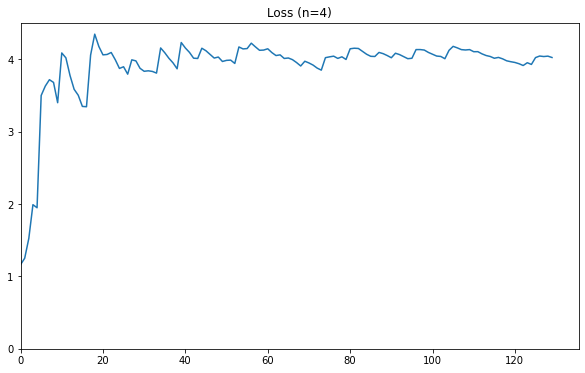

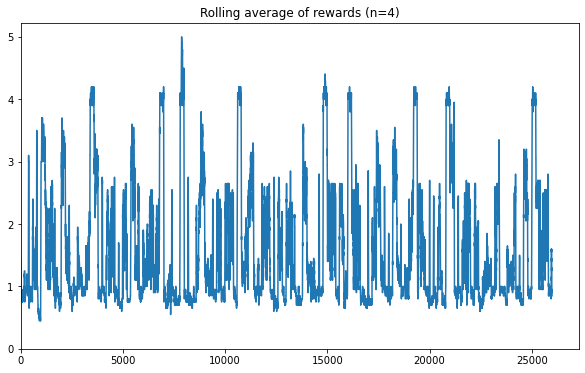

LAYER LENGTH: 8
[18:43:24] Commencement of training.
[18:43:28] Completed epoch 1: 3.2967743770587257
[18:43:32] Completed epoch 2: 2.5309233444273307
[18:43:36] Completed epoch 3: 2.3099378108882855
[18:43:40] Completed epoch 4: 2.120886949221387
[18:43:44] Completed epoch 5: 1.9816305149472073
[18:43:48] Completed epoch 6: 1.9243756223222177
[18:43:51] Completed epoch 7: 1.834786256409783
[18:43:56] Completed epoch 8: 1.834139773550515
[18:43:59] Completed epoch 9: 1.8493232257674443
[18:44:03] Completed epoch 10: 1.8111400616012687


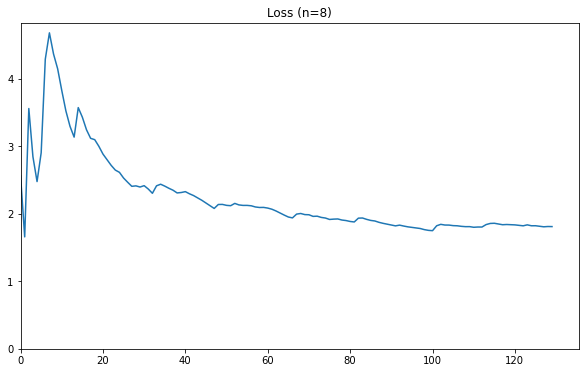

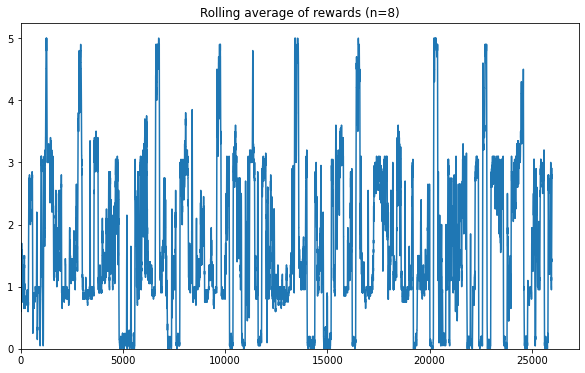

LAYER LENGTH: 12
[18:44:03] Commencement of training.
[18:44:07] Completed epoch 1: 4.665132773289478
[18:44:11] Completed epoch 2: 3.3501235423951963
[18:44:15] Completed epoch 3: 2.757903424838028
[18:44:19] Completed epoch 4: 2.428499219916384
[18:44:24] Completed epoch 5: 2.2640885993998836
[18:44:29] Completed epoch 6: 2.149419809346707
[18:44:34] Completed epoch 7: 2.054774658329295
[18:44:38] Completed epoch 8: 1.9649655598309697
[18:44:43] Completed epoch 9: 1.9596552830695948
[18:44:46] Completed epoch 10: 1.959871265980268


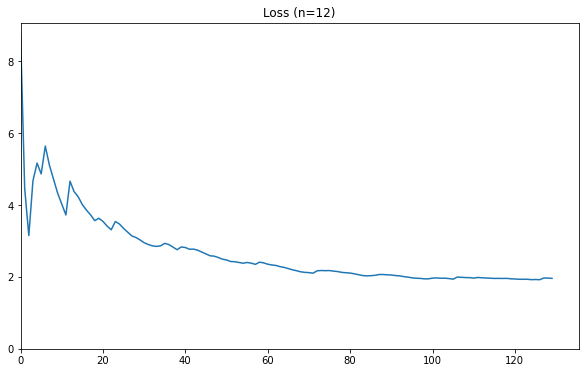

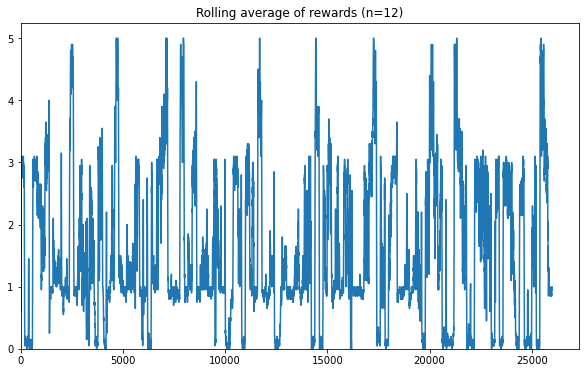

LAYER LENGTH: 16
[18:44:47] Commencement of training.
[18:44:51] Completed epoch 1: 4.280189944705787
[18:44:55] Completed epoch 2: 4.243238768341712
[18:44:59] Completed epoch 3: 4.260490122084881
[18:45:03] Completed epoch 4: 4.311807760116794
[18:45:06] Completed epoch 5: 4.281044716611619
[18:45:10] Completed epoch 6: 4.245238865288115
[18:45:14] Completed epoch 7: 4.25235711707171
[18:45:18] Completed epoch 8: 4.227618289209609
[18:45:23] Completed epoch 9: 4.289248589702407
[18:45:28] Completed epoch 10: 4.2607327961073285


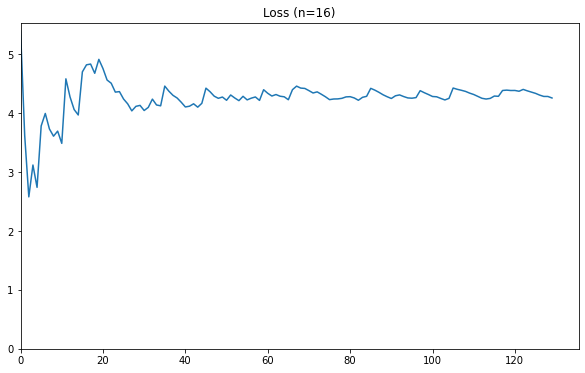

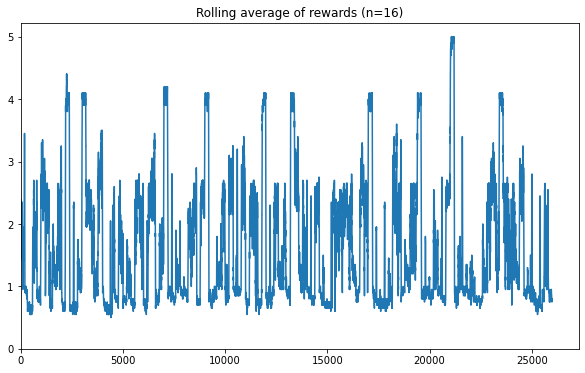

LAYER LENGTH: 20
[18:45:28] Commencement of training.
[18:45:33] Completed epoch 1: 4.684288199574388
[18:45:38] Completed epoch 2: 3.781887061734533
[18:45:43] Completed epoch 3: 3.1946229063350975
[18:45:47] Completed epoch 4: 2.692361185241578
[18:45:51] Completed epoch 5: 2.4148933216531008
[18:45:55] Completed epoch 6: 2.2194143011441514
[18:45:59] Completed epoch 7: 2.1142755506097695
[18:46:03] Completed epoch 8: 2.019537989489667
[18:46:07] Completed epoch 9: 1.9693983482311432
[18:46:11] Completed epoch 10: 1.9412886348741947


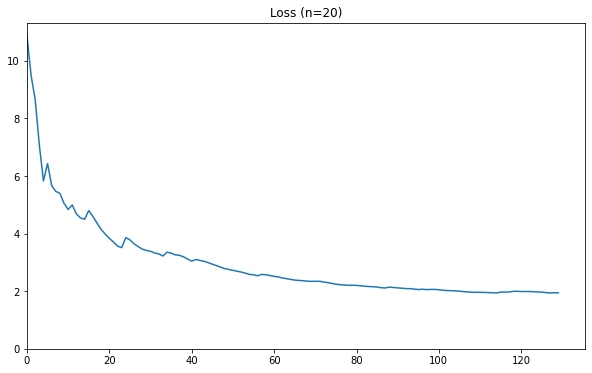

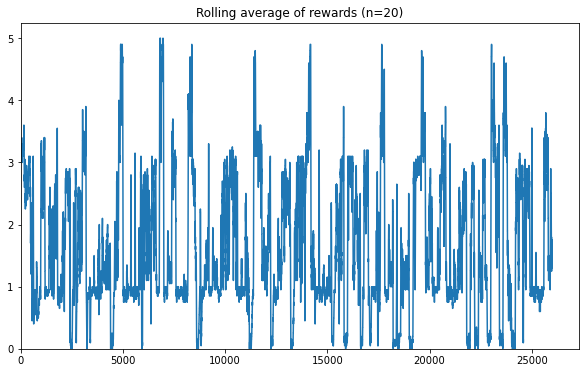

LAYER LENGTH: 24
[18:46:12] Commencement of training.
[18:46:16] Completed epoch 1: 3.408363977398623
[18:46:20] Completed epoch 2: 2.914905933611533
[18:46:24] Completed epoch 3: 2.4325182191729926
[18:46:28] Completed epoch 4: 2.0926328012403115
[18:46:32] Completed epoch 5: 1.9660172411316066
[18:46:37] Completed epoch 6: 1.919264615437491
[18:46:41] Completed epoch 7: 1.9281854613737084
[18:46:45] Completed epoch 8: 1.8529297913211682
[18:46:49] Completed epoch 9: 1.8371605373510318
[18:46:53] Completed epoch 10: 1.803007209760301


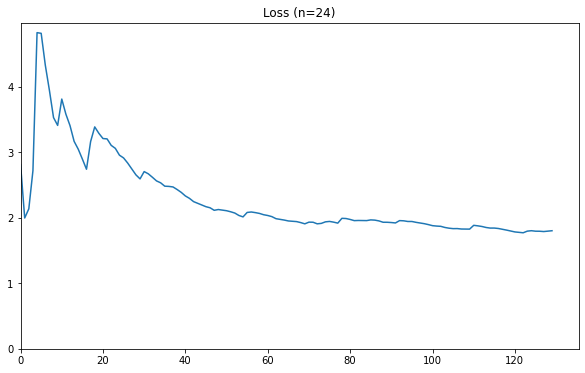

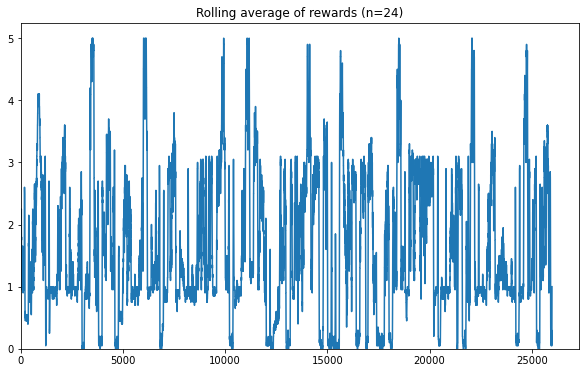

LAYER LENGTH: 28
[18:46:54] Commencement of training.
[18:46:58] Completed epoch 1: 3.921117879400267
[18:47:02] Completed epoch 2: 4.141193677031083
[18:47:07] Completed epoch 3: 4.166669358209716
[18:47:11] Completed epoch 4: 4.175883918339432
[18:47:15] Completed epoch 5: 4.136529484603697
[18:47:20] Completed epoch 6: 4.0839777407798135
[18:47:24] Completed epoch 7: 4.061627805255789
[18:47:28] Completed epoch 8: 4.073212927119575
[18:47:33] Completed epoch 9: 4.068867262758921
[18:47:37] Completed epoch 10: 4.063888401541597


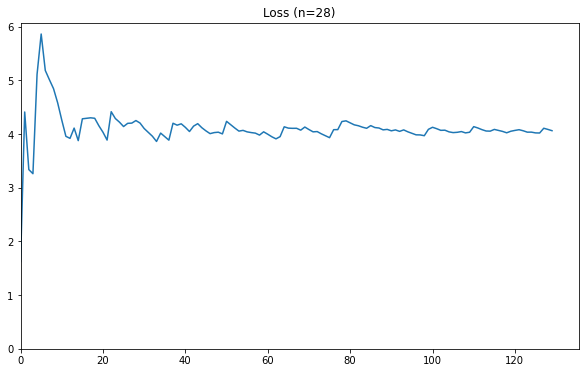

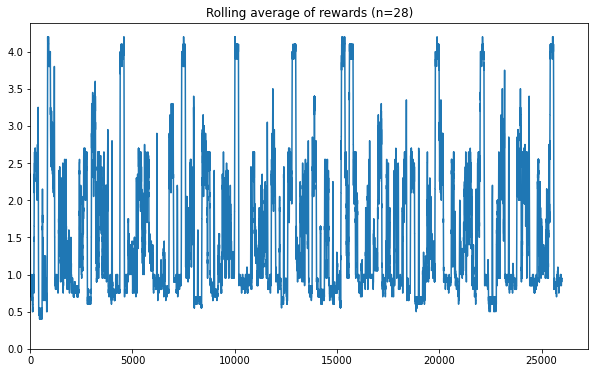

LAYER LENGTH: 32
[18:47:37] Commencement of training.
[18:47:42] Completed epoch 1: 6.130397096069959
[18:47:46] Completed epoch 2: 6.136352394188826
[18:47:50] Completed epoch 3: 6.146927237151525
[18:47:55] Completed epoch 4: 6.16211850478672
[18:47:59] Completed epoch 5: 6.163310188444761
[18:48:04] Completed epoch 6: 6.139425157037301
[18:48:08] Completed epoch 7: 6.133683101636368
[18:48:12] Completed epoch 8: 6.140338098547207
[18:48:16] Completed epoch 9: 6.1517535234949525
[18:48:20] Completed epoch 10: 6.154270478837765


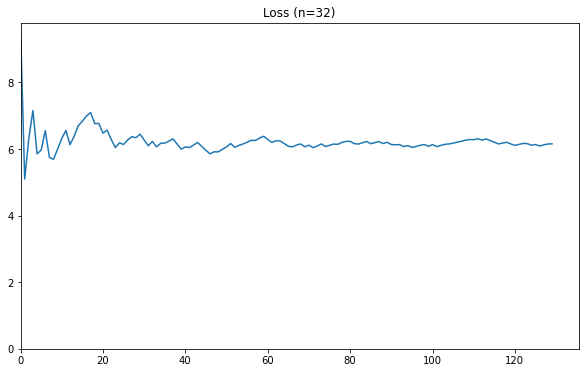

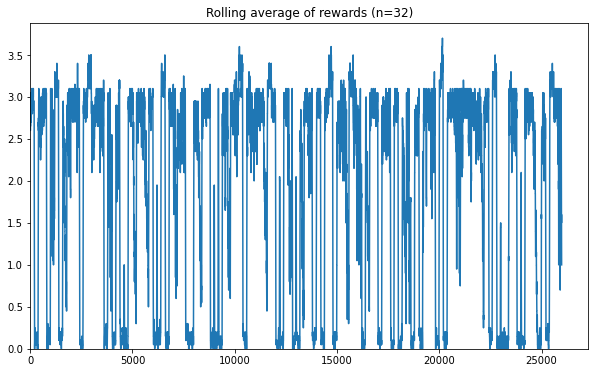

LAYER LENGTH: 36
[18:48:21] Commencement of training.
[18:48:25] Completed epoch 1: 5.5968133817942
[18:48:30] Completed epoch 2: 5.839175921666331
[18:48:34] Completed epoch 3: 5.967014717008323
[18:48:39] Completed epoch 4: 5.964876422371627
[18:48:43] Completed epoch 5: 6.011285753281917
[18:48:47] Completed epoch 6: 6.033122743119546
[18:48:52] Completed epoch 7: 6.054379933662908
[18:48:57] Completed epoch 8: 6.054361288108891
[18:49:01] Completed epoch 9: 6.058663025327561
[18:49:06] Completed epoch 10: 6.063796722794804


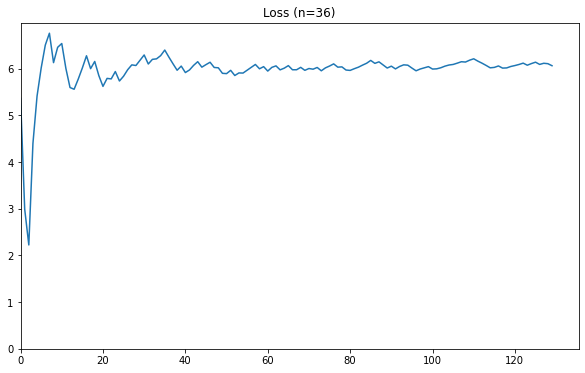

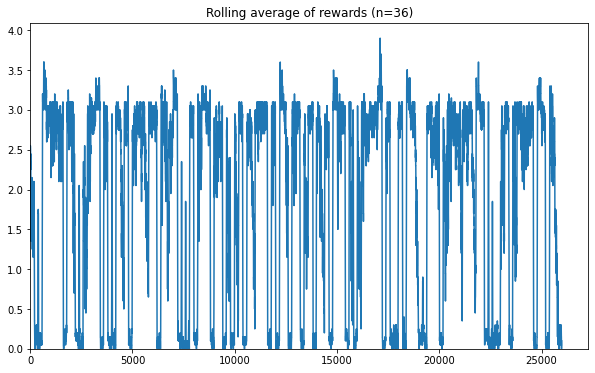

LAYER LENGTH: 40
[18:49:06] Commencement of training.
[18:49:10] Completed epoch 1: 4.325574069021342
[18:49:15] Completed epoch 2: 4.18360577493981
[18:49:18] Completed epoch 3: 4.163402083625734
[18:49:23] Completed epoch 4: 4.128331121971275
[18:49:27] Completed epoch 5: 4.294193785655866
[18:49:32] Completed epoch 6: 4.230376936544397
[18:49:37] Completed epoch 7: 3.982415142175198
[18:49:42] Completed epoch 8: 3.7215075003967266
[18:49:46] Completed epoch 9: 3.5172563851438885
[18:49:50] Completed epoch 10: 3.357193142147368


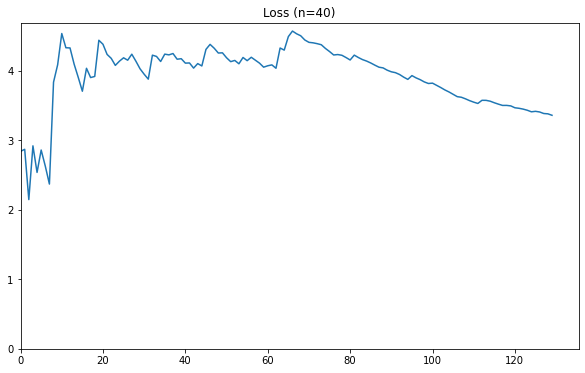

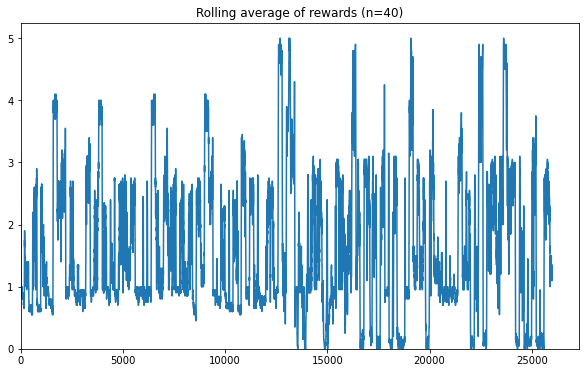

LAYER LENGTH: 44
[18:49:51] Commencement of training.
[18:49:55] Completed epoch 1: 4.417863722987429
[18:50:00] Completed epoch 2: 4.163892240141129
[18:50:04] Completed epoch 3: 4.22201280524182
[18:50:09] Completed epoch 4: 4.194813715233486
[18:50:13] Completed epoch 5: 4.175118862640835
[18:50:18] Completed epoch 6: 4.138577261616244
[18:50:22] Completed epoch 7: 3.9638158999399735
[18:50:27] Completed epoch 8: 3.7431741807008425
[18:50:31] Completed epoch 9: 3.5280951520048505
[18:50:36] Completed epoch 10: 3.319877745802424


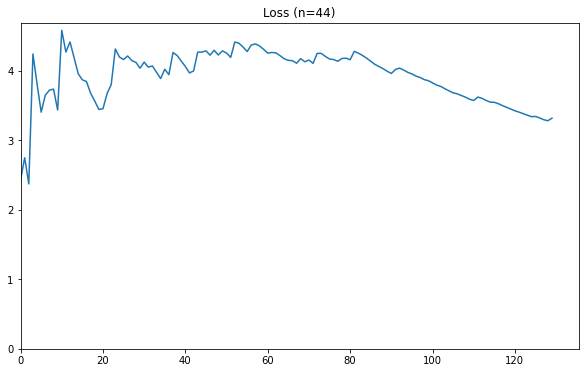

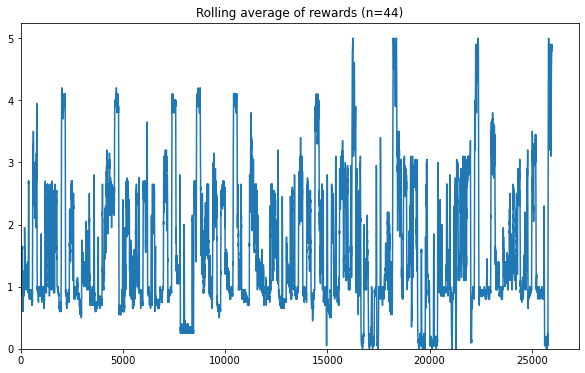

LAYER LENGTH: 48
[18:50:36] Commencement of training.
[18:50:40] Completed epoch 1: 3.3081410578743844
[18:50:45] Completed epoch 2: 2.645302290128585
[18:50:49] Completed epoch 3: 2.385314672186102
[18:50:54] Completed epoch 4: 2.266548404814195
[18:50:59] Completed epoch 5: 2.1956749285567008
[18:51:03] Completed epoch 6: 2.1092311965842336
[18:51:08] Completed epoch 7: 1.991885018808029
[18:51:13] Completed epoch 8: 1.8718767963865859
[18:51:18] Completed epoch 9: 1.7801033712992531
[18:51:22] Completed epoch 10: 1.732102998081831


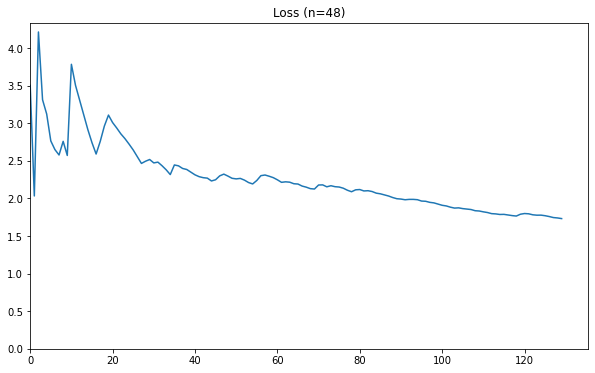

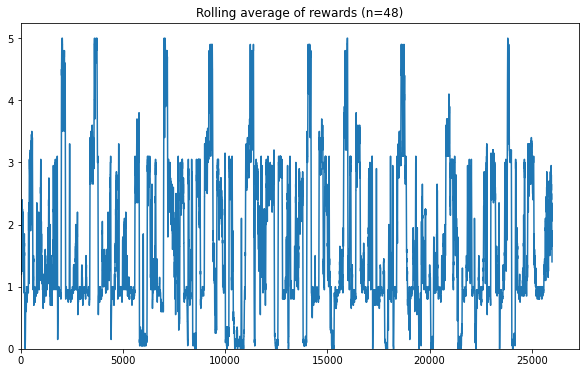

LAYER LENGTH: 52
[18:51:23] Commencement of training.
[18:51:27] Completed epoch 1: 6.2745858694570895
[18:51:32] Completed epoch 2: 6.213278542646036
[18:51:37] Completed epoch 3: 6.2016728745845375
[18:51:42] Completed epoch 4: 6.179620040553788
[18:51:47] Completed epoch 5: 6.066311417058415
[18:51:52] Completed epoch 6: 6.071926180882012
[18:51:57] Completed epoch 7: 6.079068594602164
[18:52:01] Completed epoch 8: 6.083223481815355
[18:52:06] Completed epoch 9: 6.08282258212647
[18:52:11] Completed epoch 10: 6.0790787854522845


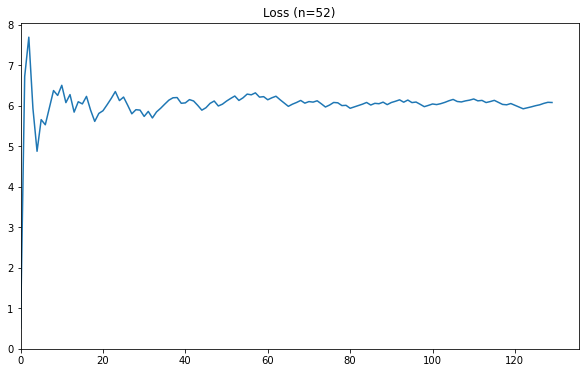

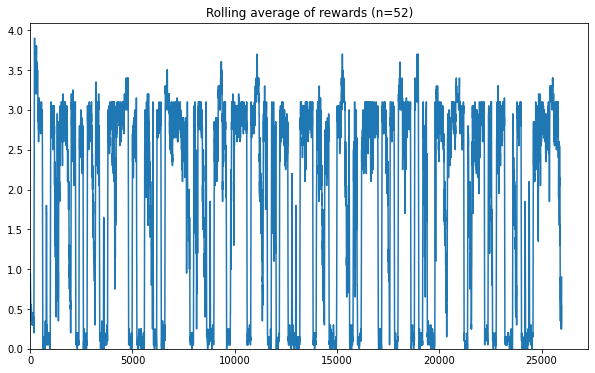

LAYER LENGTH: 56
[18:52:11] Commencement of training.
[18:52:16] Completed epoch 1: 6.241126813378054
[18:52:21] Completed epoch 2: 6.143255714381335
[18:52:25] Completed epoch 3: 6.117298681382429
[18:52:30] Completed epoch 4: 6.120666318729129
[18:52:35] Completed epoch 5: 6.140609978060227
[18:52:40] Completed epoch 6: 6.153392930434804
[18:52:45] Completed epoch 7: 6.155710423889173
[18:52:50] Completed epoch 8: 6.149996620903027
[18:52:55] Completed epoch 9: 6.169996996358246
[18:53:00] Completed epoch 10: 6.159074219799344


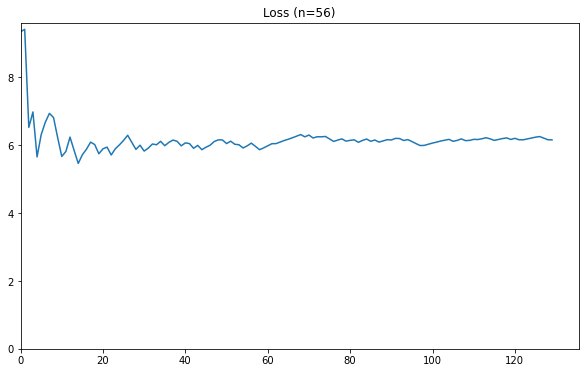

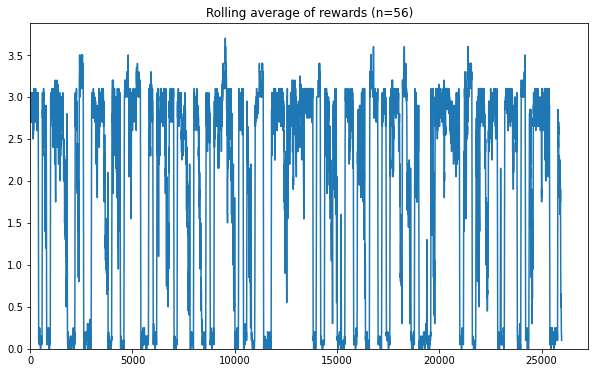

LAYER LENGTH: 60
[18:53:01] Commencement of training.
[18:53:05] Completed epoch 1: 6.007386330824632
[18:53:10] Completed epoch 2: 6.073116242335393
[18:53:15] Completed epoch 3: 6.065154417967185
[18:53:19] Completed epoch 4: 6.092231198090773
[18:53:24] Completed epoch 5: 6.1314003430880035
[18:53:29] Completed epoch 6: 6.1375772089835925
[18:53:34] Completed epoch 7: 6.105231014293628
[18:53:38] Completed epoch 8: 6.107702137506925
[18:53:43] Completed epoch 9: 6.1043677119719675
[18:53:48] Completed epoch 10: 6.100430940774771


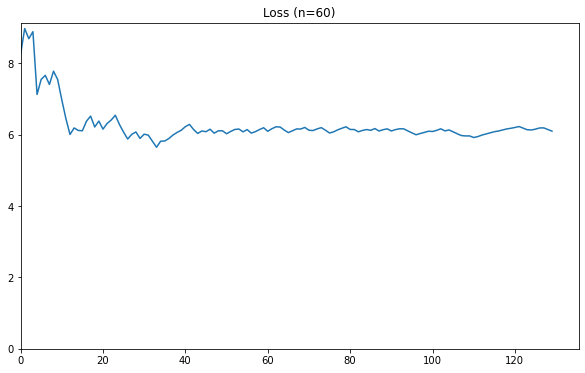

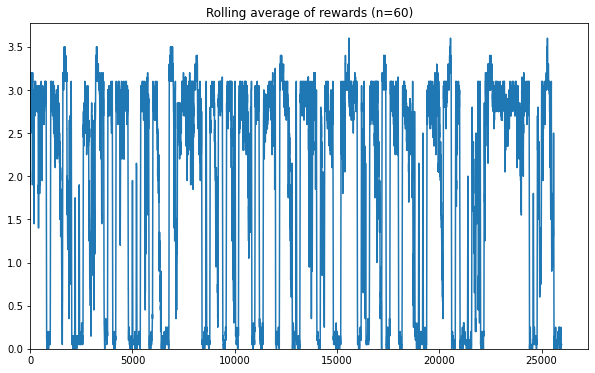

LAYER LENGTH: 64
[18:53:48] Commencement of training.
[18:53:53] Completed epoch 1: 6.119187891758405
[18:53:58] Completed epoch 2: 6.120940099725357
[18:54:03] Completed epoch 3: 6.127549810073314
[18:54:07] Completed epoch 4: 6.170085434478063
[18:54:12] Completed epoch 5: 6.133376039890143
[18:54:17] Completed epoch 6: 6.119928751190503
[18:54:22] Completed epoch 7: 6.143070797723729
[18:54:27] Completed epoch 8: 6.146725409546724
[18:54:32] Completed epoch 9: 6.139738825579994
[18:54:37] Completed epoch 10: 6.134611096868149


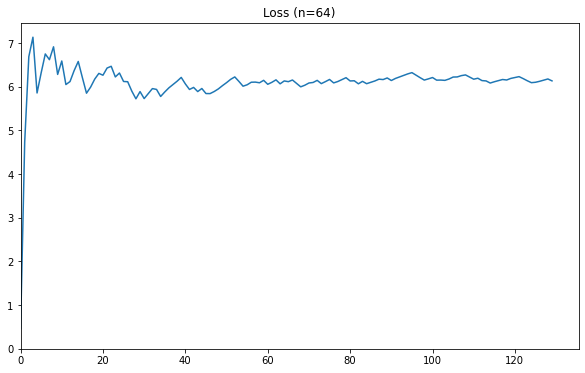

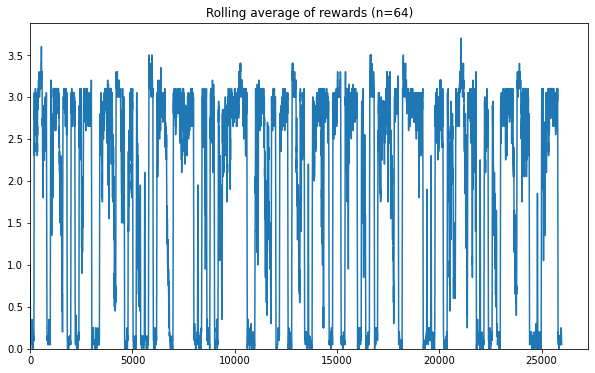

LAYER LENGTH: 68
[18:54:37] Commencement of training.
[18:54:42] Completed epoch 1: 5.776650845620495
[18:54:47] Completed epoch 2: 5.926979268964094
[18:54:53] Completed epoch 3: 5.966063102386319
[18:54:58] Completed epoch 4: 5.9865665575589695
[18:55:03] Completed epoch 5: 6.057484015277945
[18:55:08] Completed epoch 6: 6.0640571922188
[18:55:14] Completed epoch 7: 6.071774296627104
[18:55:19] Completed epoch 8: 6.070350586471792
[18:55:24] Completed epoch 9: 6.0797560768638155
[18:55:29] Completed epoch 10: 6.028972776869741


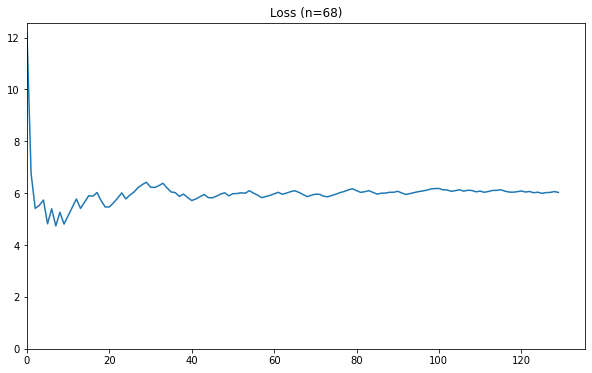

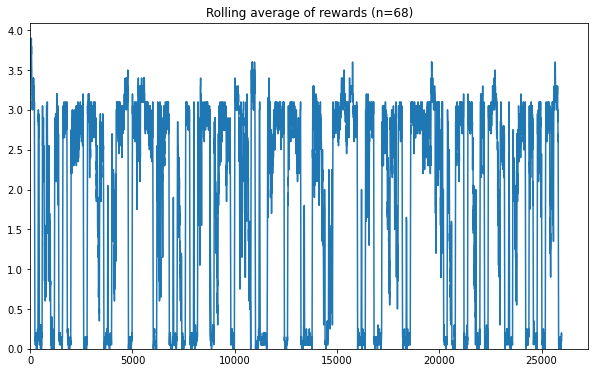

LAYER LENGTH: 72
[18:55:30] Commencement of training.
[18:55:35] Completed epoch 1: 4.098486511835358
[18:55:40] Completed epoch 2: 3.160743403560542
[18:55:45] Completed epoch 3: 2.694735052143002
[18:55:51] Completed epoch 4: 2.421955049033834
[18:55:56] Completed epoch 5: 2.190928528561174
[18:56:01] Completed epoch 6: 2.071323276978221
[18:56:06] Completed epoch 7: 2.0519468955731197
[18:56:12] Completed epoch 8: 2.0075594998085973
[18:56:17] Completed epoch 9: 1.978140223538385
[18:56:23] Completed epoch 10: 1.929099338200612


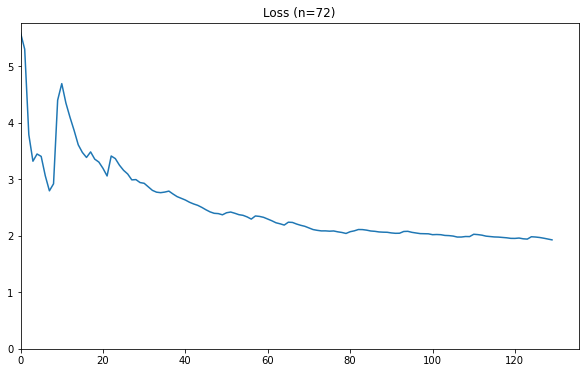

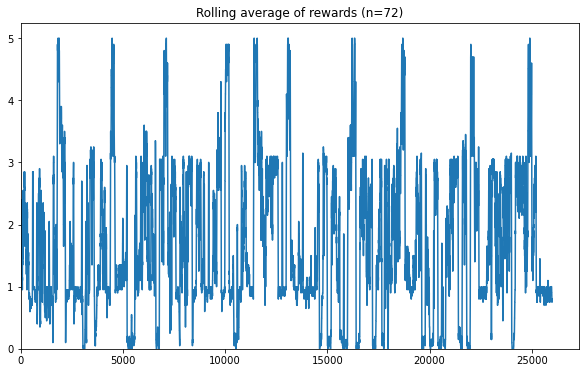

LAYER LENGTH: 76
[18:56:23] Commencement of training.
[18:56:28] Completed epoch 1: 5.0044281673880935
[18:56:33] Completed epoch 2: 4.07464446356686
[18:56:39] Completed epoch 3: 3.325175961102763
[18:56:44] Completed epoch 4: 2.9457110453347024
[18:56:50] Completed epoch 5: 2.6516405500744957
[18:56:55] Completed epoch 6: 2.4490628463049013
[18:57:01] Completed epoch 7: 2.3075249957295885
[18:57:06] Completed epoch 8: 2.172870788869975
[18:57:12] Completed epoch 9: 2.0681455746660697
[18:57:18] Completed epoch 10: 2.044350206939094


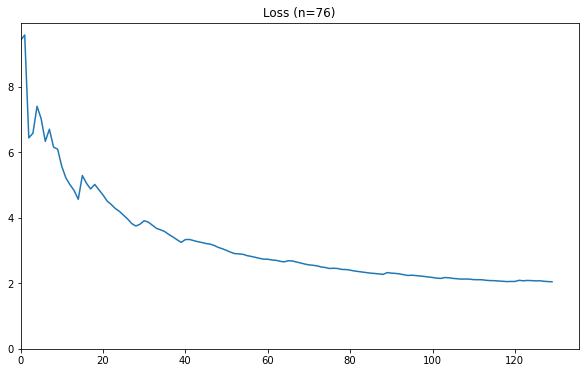

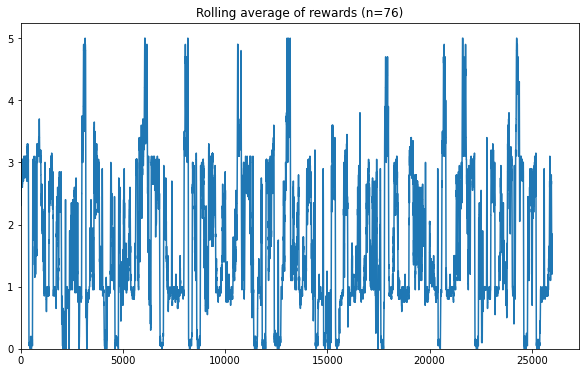

LAYER LENGTH: 80
[18:57:18] Commencement of training.
[18:57:23] Completed epoch 1: 6.070906840471121
[18:57:29] Completed epoch 2: 6.084299574081714
[18:57:34] Completed epoch 3: 6.092866382721143
[18:57:39] Completed epoch 4: 6.135803633194703
[18:57:44] Completed epoch 5: 6.126950598863455
[18:57:50] Completed epoch 6: 6.118548575975956
[18:57:55] Completed epoch 7: 6.1271075706167535
[18:58:00] Completed epoch 8: 6.12136335505889
[18:58:05] Completed epoch 9: 6.114887084838672
[18:58:10] Completed epoch 10: 6.112013760970189


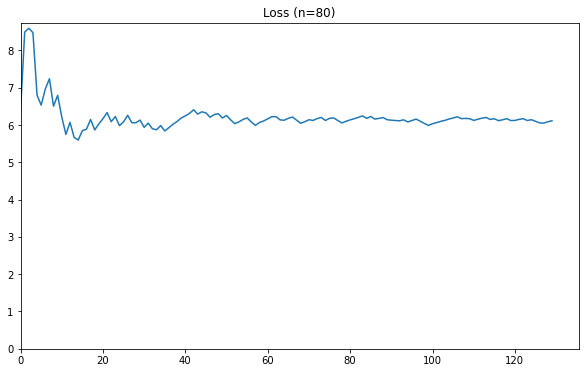

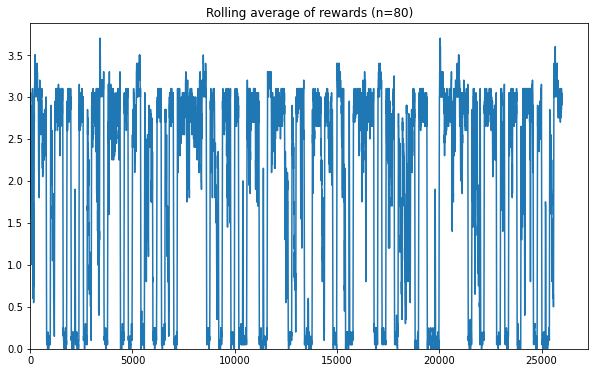

LAYER LENGTH: 84
[18:58:10] Commencement of training.
[18:58:16] Completed epoch 1: 6.213362388771314
[18:58:21] Completed epoch 2: 6.1909119636164265
[18:58:27] Completed epoch 3: 6.147274642410951
[18:58:32] Completed epoch 4: 6.112090597192829
[18:58:38] Completed epoch 5: 5.976057093138878
[18:58:43] Completed epoch 6: 5.991842449410604
[18:58:48] Completed epoch 7: 6.031029791802496
[18:58:55] Completed epoch 8: 6.039795298596414
[18:59:00] Completed epoch 9: 6.059006077384847
[18:59:06] Completed epoch 10: 6.056643931184824


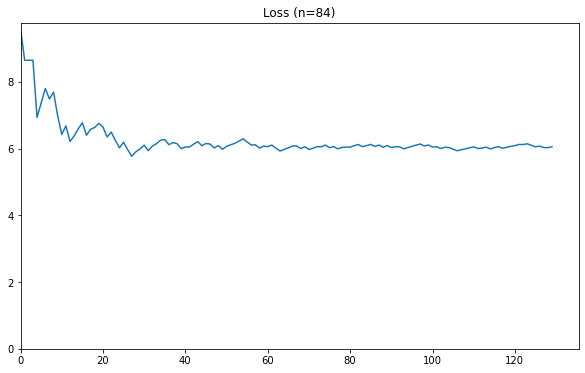

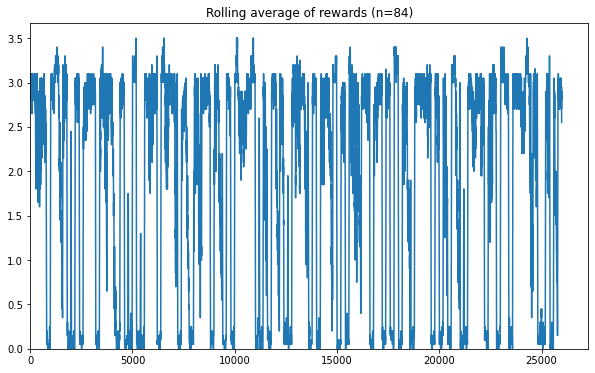

LAYER LENGTH: 88
[18:59:06] Commencement of training.
[18:59:12] Completed epoch 1: 6.1963588851002545
[18:59:18] Completed epoch 2: 6.1845255963962815
[18:59:23] Completed epoch 3: 6.153401679648803
[18:59:30] Completed epoch 4: 6.156012798198141
[18:59:35] Completed epoch 5: 6.129348700096974
[18:59:41] Completed epoch 6: 6.110354685978248
[18:59:47] Completed epoch 7: 6.096952368201135
[18:59:53] Completed epoch 8: 6.1086794760221474
[18:59:59] Completed epoch 9: 6.107074064156438
[19:00:04] Completed epoch 10: 6.10948204235618


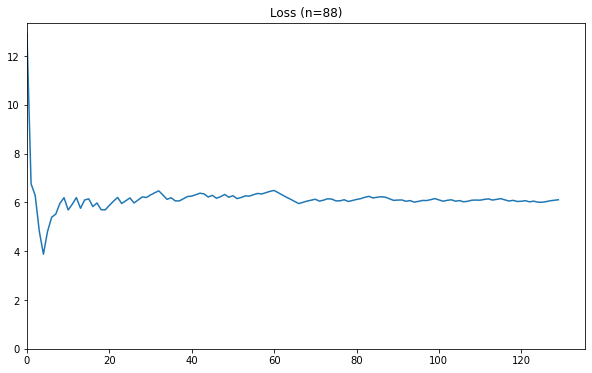

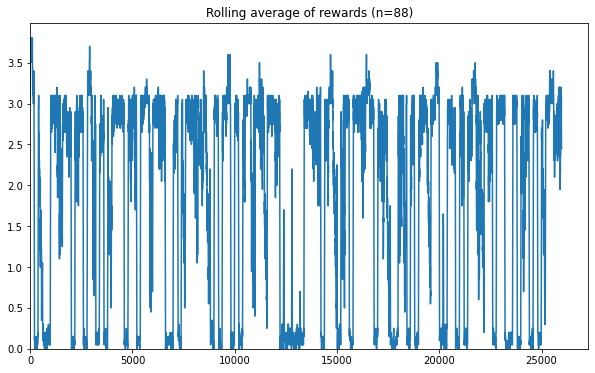

LAYER LENGTH: 92
[19:00:05] Commencement of training.
[19:00:10] Completed epoch 1: 6.169382841598529
[19:00:16] Completed epoch 2: 6.157768343876188
[19:00:21] Completed epoch 3: 6.123896844635407
[19:00:27] Completed epoch 4: 6.108980325784247
[19:00:33] Completed epoch 5: 6.086184260627398
[19:00:38] Completed epoch 6: 6.071499704368986
[19:00:44] Completed epoch 7: 6.044856889459131
[19:00:50] Completed epoch 8: 6.039874778276739
[19:00:56] Completed epoch 9: 6.039162196075051
[19:01:01] Completed epoch 10: 6.036399822621392


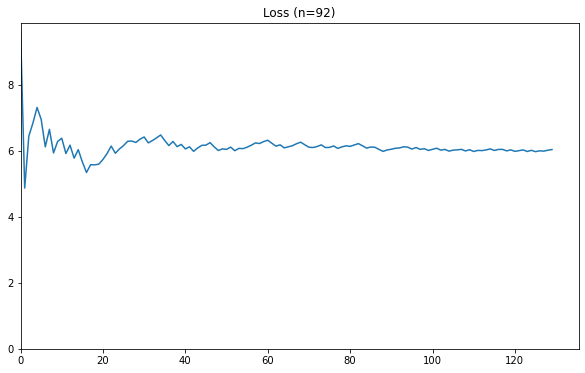

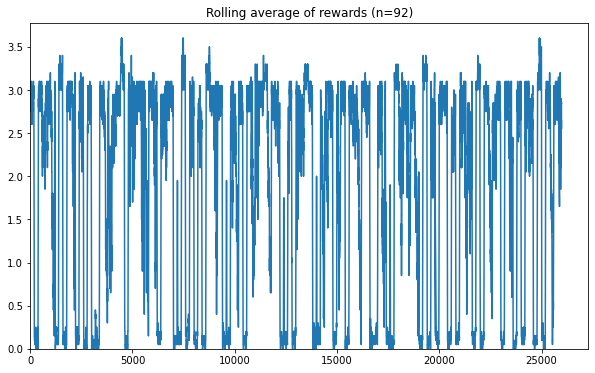

LAYER LENGTH: 96
[19:01:02] Commencement of training.
[19:01:07] Completed epoch 1: 6.168763685501538
[19:01:13] Completed epoch 2: 6.175343381212308
[19:01:19] Completed epoch 3: 6.161126356705641
[19:01:24] Completed epoch 4: 6.146902459836923
[19:01:30] Completed epoch 5: 6.142598890946462
[19:01:36] Completed epoch 6: 6.1567170245066665
[19:01:42] Completed epoch 7: 6.150427779247472
[19:01:48] Completed epoch 8: 6.066672383764615
[19:01:54] Completed epoch 9: 6.0782814351411965
[19:01:59] Completed epoch 10: 6.090645599319385


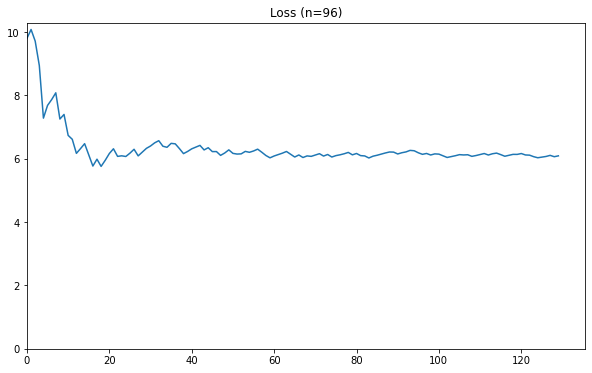

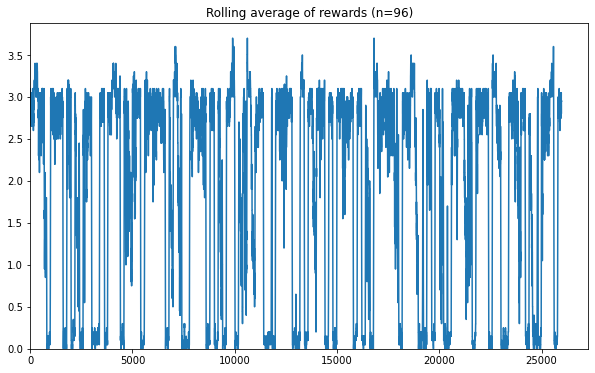

LAYER LENGTH: 100
[19:02:00] Commencement of training.
[19:02:05] Completed epoch 1: 3.8774989746267194
[19:02:11] Completed epoch 2: 3.1615901244160662
[19:02:18] Completed epoch 3: 2.7134909751947536
[19:02:24] Completed epoch 4: 2.409474299929612
[19:02:31] Completed epoch 5: 2.206705034057907
[19:02:37] Completed epoch 6: 2.0581762766519027
[19:02:43] Completed epoch 7: 1.976486550767753
[19:02:49] Completed epoch 8: 1.9656885306067235
[19:02:56] Completed epoch 9: 1.9230678168860484
[19:03:02] Completed epoch 10: 1.8370755142995705


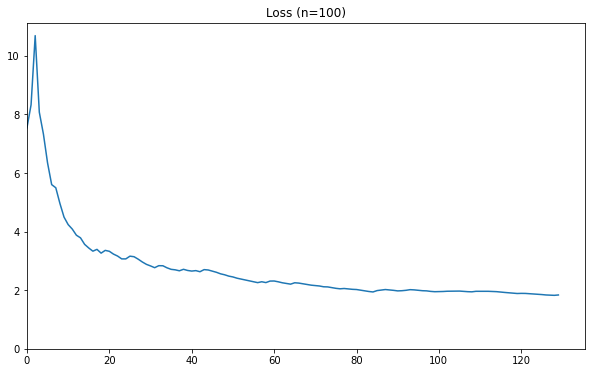

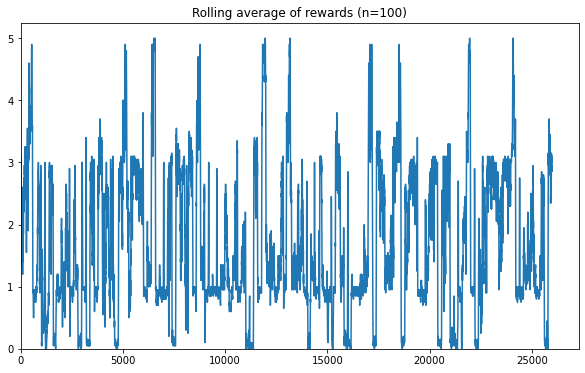

LAYER LENGTH: 104
[19:03:02] Commencement of training.
[19:03:07] Completed epoch 1: 6.007233107448018
[19:03:13] Completed epoch 2: 6.032847322954779
[19:03:19] Completed epoch 3: 6.057154625559596
[19:03:25] Completed epoch 4: 6.083923661477389
[19:03:31] Completed epoch 5: 6.097985083028065
[19:03:37] Completed epoch 6: 6.0840901332926185
[19:03:44] Completed epoch 7: 6.090868465899168
[19:03:50] Completed epoch 8: 6.004894523046387
[19:03:56] Completed epoch 9: 6.03059000339166
[19:04:02] Completed epoch 10: 6.042107926129417


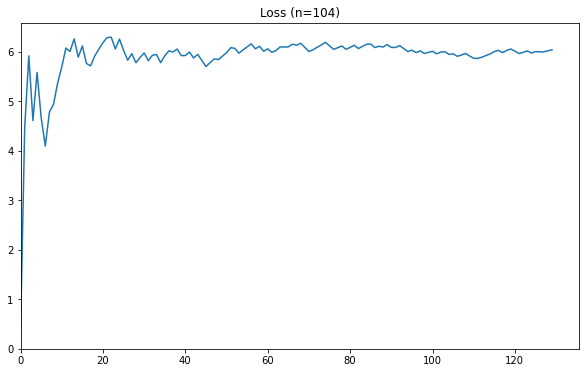

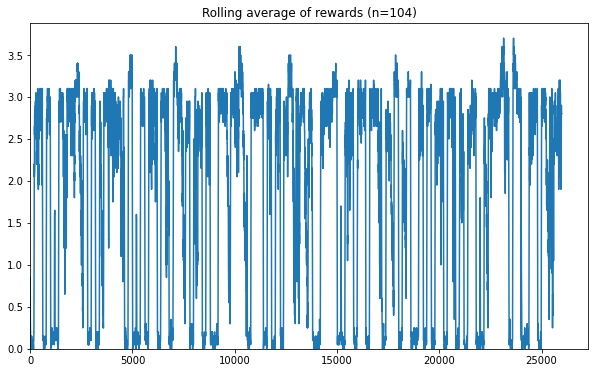

LAYER LENGTH: 108
[19:04:02] Commencement of training.
[19:04:08] Completed epoch 1: 6.140450554290545
[19:04:14] Completed epoch 2: 6.1213791232991195
[19:04:19] Completed epoch 3: 6.144252748866079
[19:04:25] Completed epoch 4: 6.125978023188021
[19:04:31] Completed epoch 5: 5.971782418550418
[19:04:37] Completed epoch 6: 5.973152015458681
[19:04:43] Completed epoch 7: 5.969624804459089
[19:04:48] Completed epoch 8: 5.9873640115940105
[19:04:54] Completed epoch 9: 6.0007338222716
[19:05:00] Completed epoch 10: 6.025968132352132


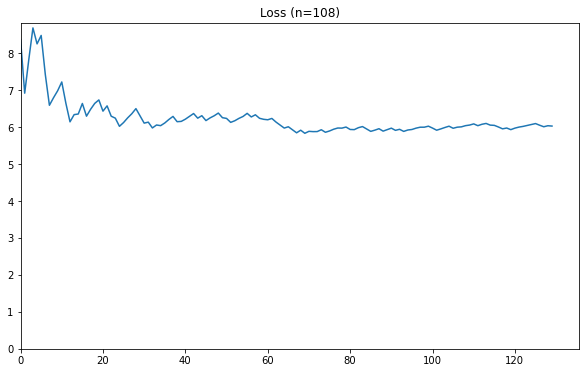

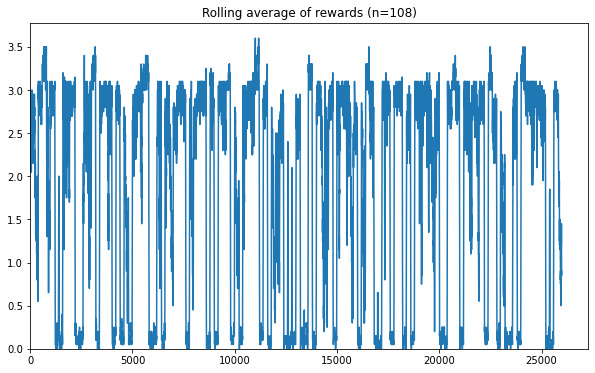

LAYER LENGTH: 112
[19:05:01] Commencement of training.
[19:05:06] Completed epoch 1: 6.2829982357758745
[19:05:12] Completed epoch 2: 6.187460656349476
[19:05:17] Completed epoch 3: 6.179845565771445
[19:05:23] Completed epoch 4: 6.189980328174737
[19:05:29] Completed epoch 5: 6.180676570232098
[19:05:34] Completed epoch 6: 6.196717654680595
[19:05:40] Completed epoch 7: 6.179659088627322
[19:05:45] Completed epoch 8: 6.189605548702754
[19:05:51] Completed epoch 9: 6.1803331373084305
[19:05:56] Completed epoch 10: 6.191722900500665


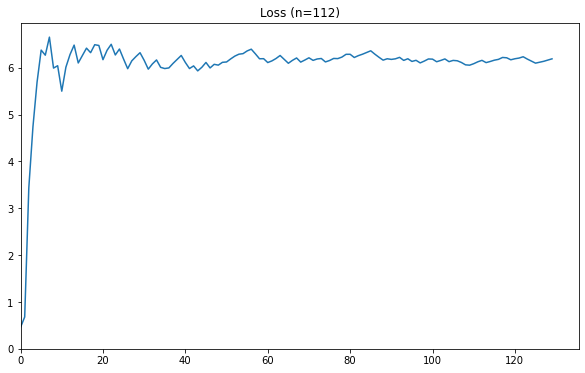

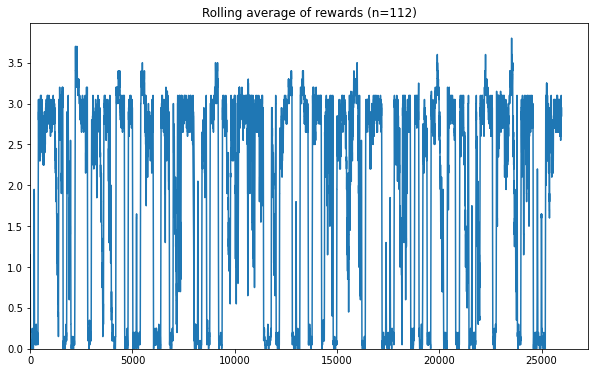

LAYER LENGTH: 116
[19:05:57] Commencement of training.
[19:06:03] Completed epoch 1: 5.930127939536021
[19:06:10] Completed epoch 2: 6.055833200537242
[19:06:17] Completed epoch 3: 6.057606749076109
[19:06:24] Completed epoch 4: 6.06214736949939
[19:06:31] Completed epoch 5: 6.065871741753358
[19:06:38] Completed epoch 6: 6.09867516940985
[19:06:45] Completed epoch 7: 6.0769962990545965
[19:06:52] Completed epoch 8: 6.083621761672772
[19:06:59] Completed epoch 9: 6.08279199328178
[19:07:06] Completed epoch 10: 6.079666640107448


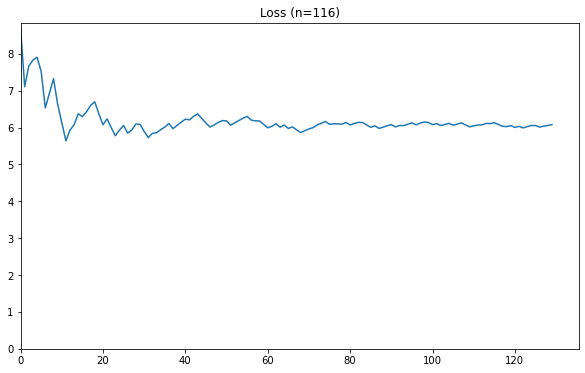

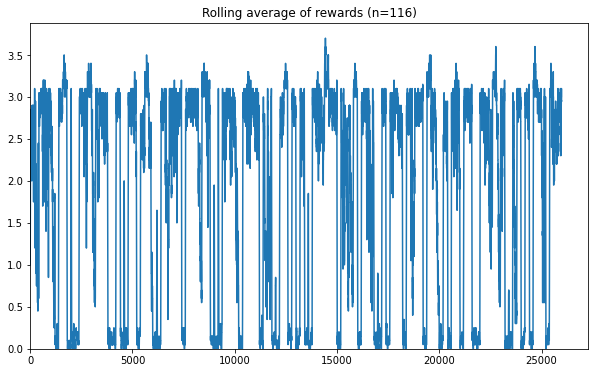

LAYER LENGTH: 120
[19:07:06] Commencement of training.
[19:07:12] Completed epoch 1: 6.028294371824998
[19:07:18] Completed epoch 2: 6.043762570527884
[19:07:24] Completed epoch 3: 6.0703288931724355
[19:07:30] Completed epoch 4: 6.115823592956249
[19:07:36] Completed epoch 5: 6.093505028211154
[19:07:42] Completed epoch 6: 6.118754190175961
[19:07:47] Completed epoch 7: 6.115195899271703
[19:07:54] Completed epoch 8: 6.10079641186274
[19:08:00] Completed epoch 9: 6.094169460117308
[19:08:06] Completed epoch 10: 6.088214052567115


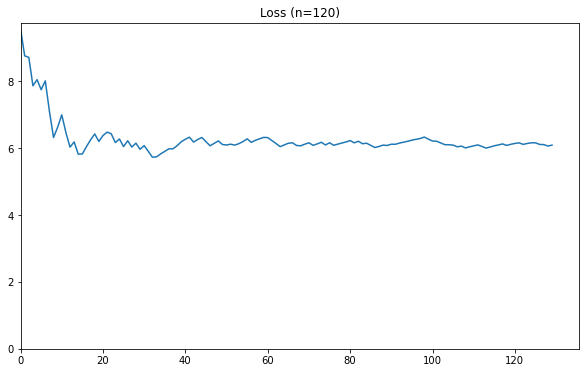

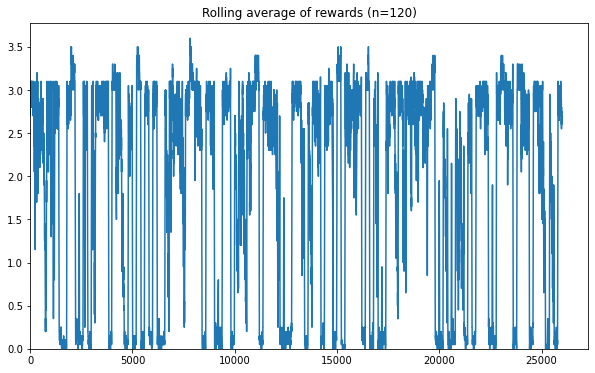

LAYER LENGTH: 124
[19:08:06] Commencement of training.
[19:08:12] Completed epoch 1: 6.007235266494637
[19:08:19] Completed epoch 2: 6.141886864016549
[19:08:25] Completed epoch 3: 6.129719447805904
[19:08:32] Completed epoch 4: 6.119597278162121
[19:08:38] Completed epoch 5: 6.133370130222004
[19:08:45] Completed epoch 6: 6.110500749543978
[19:08:51] Completed epoch 7: 6.113780862246487
[19:08:59] Completed epoch 8: 6.108260177542599
[19:09:05] Completed epoch 9: 6.104094516790003
[19:09:12] Completed epoch 10: 6.103838911264848


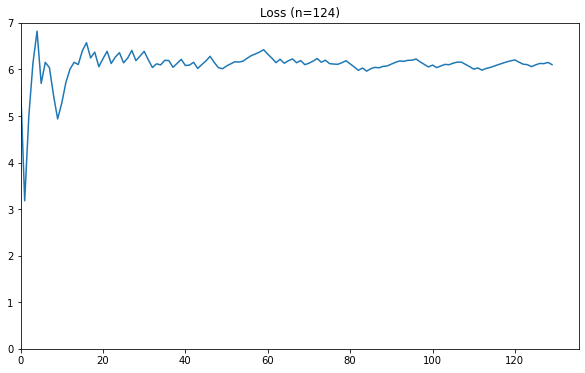

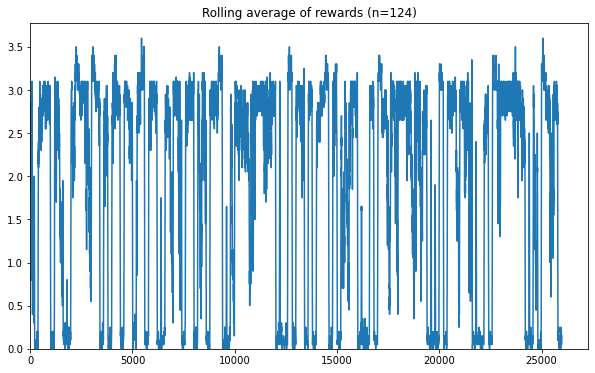

In [4]:
for n in range(4, 128, 4):
    print("LAYER LENGTH:", n)
    print("=================")

    env = get_env()
    agent = QLearningTest(n)
    env.train(
        trainee=agent,
        continuation_probability=1,
        limit=200,
        noise=0,
        repetitions=1,
        epochs=10,
    )

    # print(agent._q_network)
    # print(env.counts)

    # s = sum(env.counts.values())
    # print({a: env.counts[a] / s for a in env.counts})

    plt.title(f"Loss (n={n})")
    plt.plot(env.metric_history)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

    N = 20

    plt.title(f"Rolling average of rewards (n={n})")
    plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

    # agent._q_network.eval()
    # play_tournament(agent)

    # plt.title("Cumulative regret (vs cooperating)")
    # plt.plot(np.cumsum(3 - np.array(env.rewards)))
    # plt.xlim(left=0)
    # plt.ylim(bottom=0)
    # plt.show()